<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Digital-signal-processing" data-toc-modified-id="Digital-signal-processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Digital signal processing</a></span><ul class="toc-item"><li><span><a href="#Hilbert-Transformation" data-toc-modified-id="Hilbert-Transformation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Hilbert Transformation</a></span></li><li><span><a href="#Fourier-Transformation" data-toc-modified-id="Fourier-Transformation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fourier Transformation</a></span></li><li><span><a href="#Butterworth-bandpass-filter" data-toc-modified-id="Butterworth-bandpass-filter-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Butterworth bandpass filter</a></span></li></ul></li></ul></div>

# Digital signal processing 
The file ‘SingleSignal.xlsx’ contains 512 cells that represent an ultrasound signal in the time-domain with sampling frequency of 7.2 MHz.

1. Compute the Hilbert transform of this signal to obtain the instantaneous amplitude, frequency, and phase. At what time exactly does the signal peak? Compute the amplitude frequency and phase at this time.
2. Compute the Fourier transform of the signal and make the amplitude (dB) vs frequency plot for this signal. What is the dominant frequency of this signal?
3. What is the advantage and disadvantage of butterworth and brickwall filters? Design the best filter that limits the frequency bandwidth of the signal from ~ 0.5 times to ~1.5 times the dominant frequency that you calculated in previous question while the ringing effect in time domain is minimized. Plot the filter response. Feel free to change the thresholds slightly as needed.
4. Extract all zero crossings of the signal between 15 and 30 μs. And mark them on the plotted signal.

In [1]:
%reset -f

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('dark_background')

In [3]:
singleSignal = pd.read_excel("singleSignal.xlsx", sheet_name="Sheet1", header=None)
print('First few rows of the singleSignal.')
singleSignal.head()

First few rows of the singleSignal.


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.191283,0.106135,-0.002084,-0.127349,-0.256425,-0.377293,-0.474489,-0.537875,-0.558315,-0.53711,...,0.213272,0.233827,0.256206,0.275852,0.291733,0.301658,0.305729,0.300935,0.284617,0.249511


In [4]:
print('Checking to see if any signal values are missing.')
singleSignal.isnull().values.any()

Checking to see if any signal values are missing.


False

In [5]:
fs = 7.2 # MHz # The sampling frequency
nsteps = len(singleSignal.columns) # which is 512
t = pd.DataFrame({'A':np.linspace(0,nsteps-1,nsteps)})
t /= fs
t = np.array(t['A'])

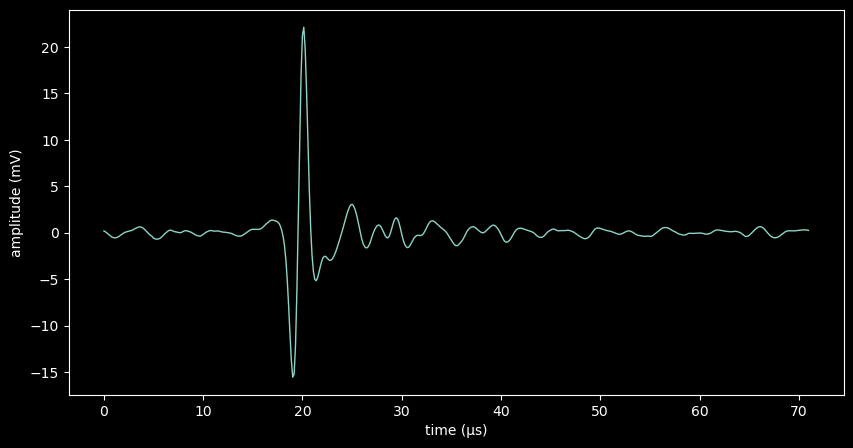

In [6]:
plt.figure(figsize=(10,5))
plt.xlabel('time (\u03BCs)')
plt.ylabel('amplitude (mV)');
plt.plot(t, singleSignal.iloc[0], ls='-', lw=1)

## Hilbert Transformation

Peak time (μs)= 19.861111
Peak amplitude (mV)= 23.647583
Peak phase = 30.645237
Peak frequency (MHz)= 0.413811


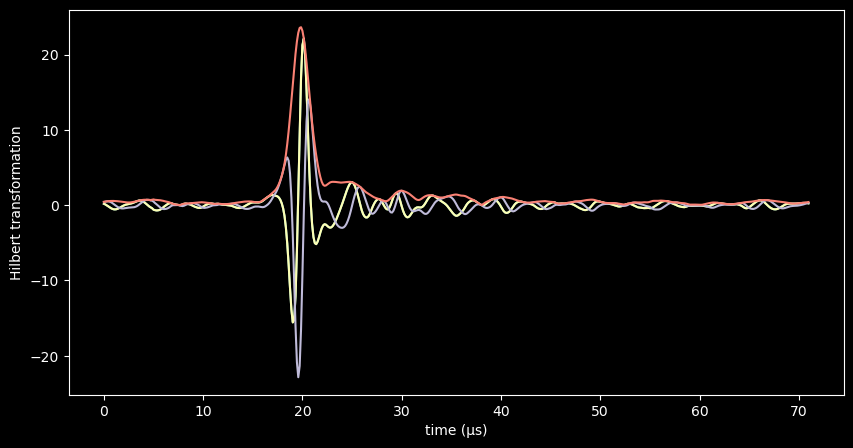

In [7]:
from scipy.signal import hilbert

analytical_signal = hilbert(singleSignal.iloc[0])
amplitude_envelope = np.abs(analytical_signal)
instantaneous_phase = np.unwrap(np.angle(analytical_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)

plt.figure(figsize=(10,5))
plt.xlabel('time (\u03BCs)')
plt.ylabel('Hilbert transformation');
plt.plot(t, singleSignal.iloc[0])
plt.plot(t, analytical_signal.real)
plt.plot(t, analytical_signal.imag)
plt.plot(t, amplitude_envelope)

peak_amp = np.max(amplitude_envelope)
peak_index = np.where(amplitude_envelope == peak_amp)
peak_phase = instantaneous_phase[peak_index]
peak_freq = instantaneous_frequency[peak_index]

peak_time = t[peak_index]
print('Peak time (\u03BCs)= %f' % (peak_time))
print('Peak amplitude (mV)= %f' % (peak_amp))
print('Peak phase = %f' % (peak_phase[0]))
print('Peak frequency (MHz)= %f' % (peak_freq[0]))

## Fourier Transformation

In [8]:
max(t)

70.97222222222221

Dominant frequency (MHz)= 0.239530


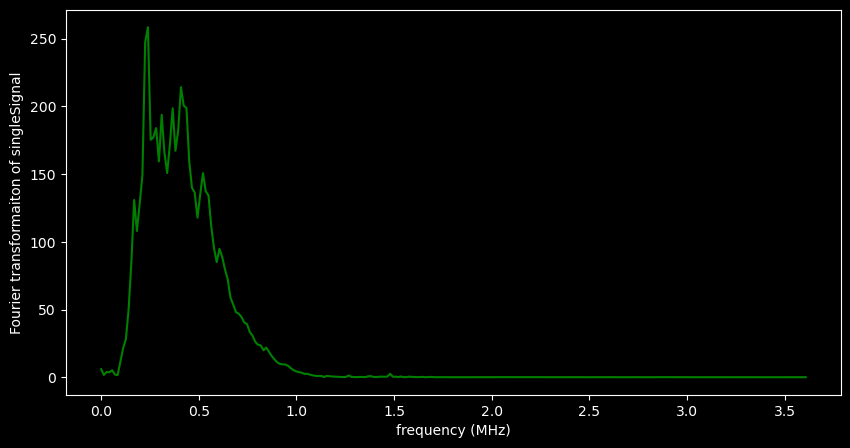

In [10]:
w = np.fft.rfftfreq(nsteps, max(t) / nsteps)
plt.figure(figsize=(10,5))
u0 = np.fft.rfft(singleSignal.iloc[0])
plt.plot(w, abs(u0), color='g')
plt.xlabel('frequency (MHz)')
plt.ylabel('Fourier transformaiton of singleSignal');

peak = np.max(abs(u0))
dom_index = np.where(abs(u0) == peak)
dom_freq = w[dom_index]
dom_freq = dom_freq[0]
print('Dominant frequency (MHz)= %f' % (dom_freq))

To calculate the power with units of dB, we need a reference power, which is not given in the question. For that reason I have picked an arbitrary reference value. The resulted figure shows considerable noise in higher frequencies.

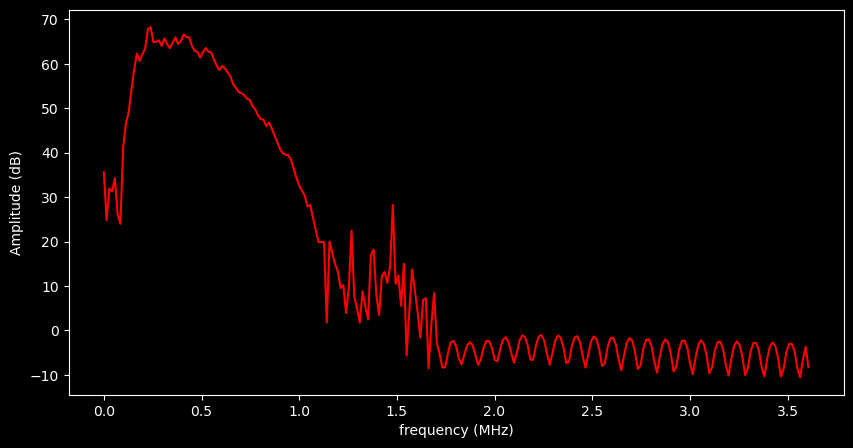

In [11]:
a0 = 10**-1  # reference power is not given, so I picked arbitrary number
plt.figure(figsize=(10,5))
plt.plot(w, 20*np.log10(abs(u0)/a0), color='r')
plt.xlabel('frequency (MHz)')
plt.ylabel('Amplitude (dB)'); 

## Butterworth bandpass filter
The Butterworth filter is a type of signal processing filter designed to have as flat frequency response as possible (no ripples) in the pass-band and zero roll off response in the stop-band. Butterworth filters are one of the most commonly used digital filters in motion analysis and in audio circuits. They are fast and simple to use. Since they are frequency-based, the effect of filtering can be easily understood and predicted. Choosing a cutoff frequency is easier than estimating the error involved in the raw data in the spline methods. However, one main disadvantage of the Butterworth filter is that it achieves this pass band flatness at the expense of a wide transition band as the filter changes from the pass band to the stop band. It also has poor phase characteristics as well. 

The ideal frequency response, referred to as a "brick wall" filter. However, in practice this "ideal" frequency response is unattainable as it produces excessive passband ripple. Note that the higher the Butterworth filter order, the higher the number of cascaded stages there are within the filter design, and the closer the filter becomes to the ideal "brick wall" response. (see: How to Design 10 kHz filter (Using Butterworth filter design) Application notes. By Vadim Kim
https://www.egr.msu.edu/classes/ece480/capstone/fall11/group02/web/Documents/How%20to%20Design%2010%20kHz%20filter-Vadim.pdf)

In this study, I design a Butterworth bandpass filter and use it on the singnal. The first two figures show the filter for a few order numbers, and the original time-domain signal with its Butterworth-filtered response, respectively. Here, we have chosen 0.5 times and 1.5 times of the dominant frequency (calculated from fft) as cutoff frequencies. We observe that with this choice of limits, as the order of filter increases, the "group delay" of the filter also increases. It can be seen in the shifted peaks in the reponse spectrum compared to the original signal.

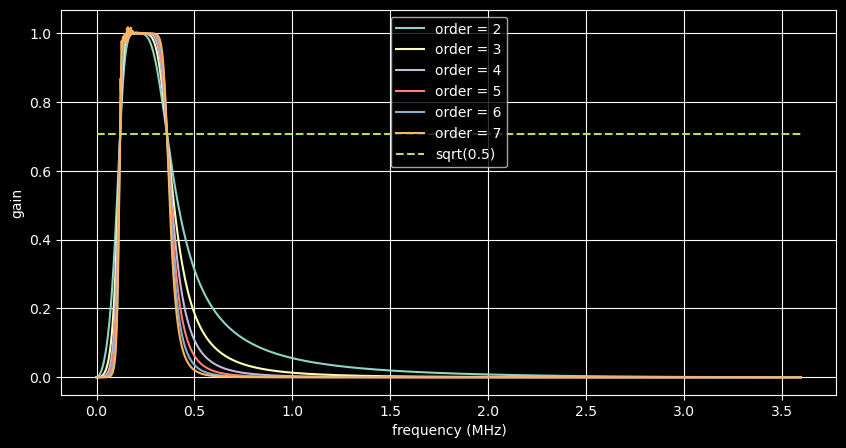

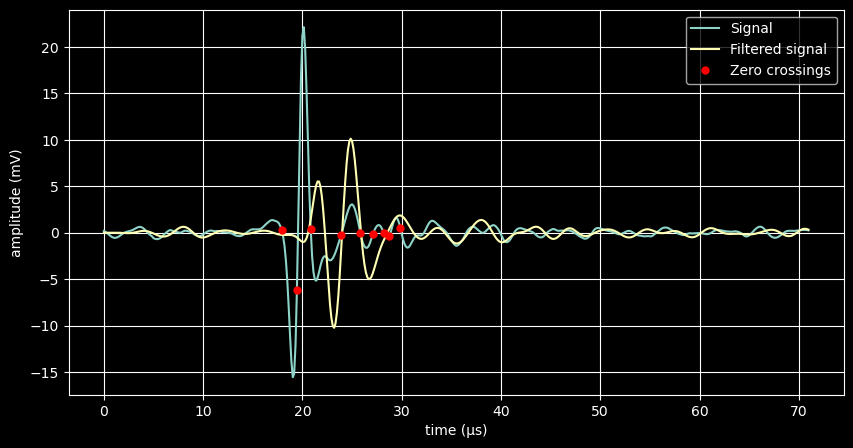

In [12]:
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Sample rate and desired cutoff frequencies (in Hz).
lowcut = 0.5 * dom_freq
highcut = 1.5 * dom_freq

# Plot the frequency response for a few different orders.
plt.figure(1, figsize=(10, 5))

for order in [2, 3, 4, 5, 6, 7]:  # Higher orders are diverging
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)], '--', label='sqrt(0.5)')
plt.xlabel('frequency (MHz)')
plt.ylabel('gain')
plt.grid(True)
plt.legend(loc='best')

plt.figure(2, figsize=(10, 5))
plt.plot(t, singleSignal.iloc[0], label='Signal')

y = butter_bandpass_filter(singleSignal.iloc[0], lowcut, highcut, fs, order=5)
plt.plot(t, y, label='Filtered signal')
plt.xlabel('time (\u03BCs)')
plt.ylabel('amplitude (mV)')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='best') # loc='upper left'

zero_crossings = np.where(np.diff(np.sign(singleSignal.iloc[0])))[0]
zero_crossings = zero_crossings[(zero_crossings>=np.min(np.where(t>15))) & (zero_crossings<=np.max(np.where(t<30)))]
singleSignal.iloc[0][zero_crossings]
plt.plot(t[zero_crossings], singleSignal.iloc[0, zero_crossings], ls='', marker='o', markersize=5, color = 'r',label='Zero crossings')
plt.legend(loc='best')

plt.show()

To improve the quality of the response, I move the highcut limit to 4 times of the dominant frequancy (rather than 1.5 times), and use smaller order numner. This way, the resonse seems to be suffering less from the group delay effect. It also seems to me that the "ringing" effect has become less visible in the new response signal, but it needs a more trained eye (trained on these signals) to be judge of that.

As requested, I also show the "zero crossings" of the signal in the mentioned time interval.

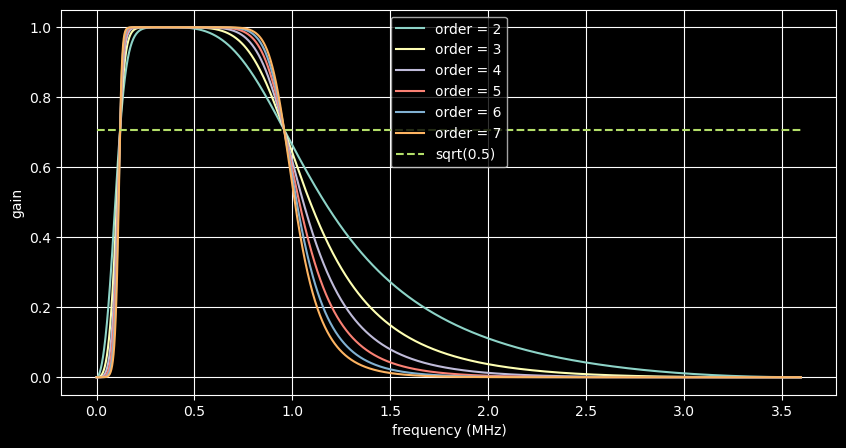

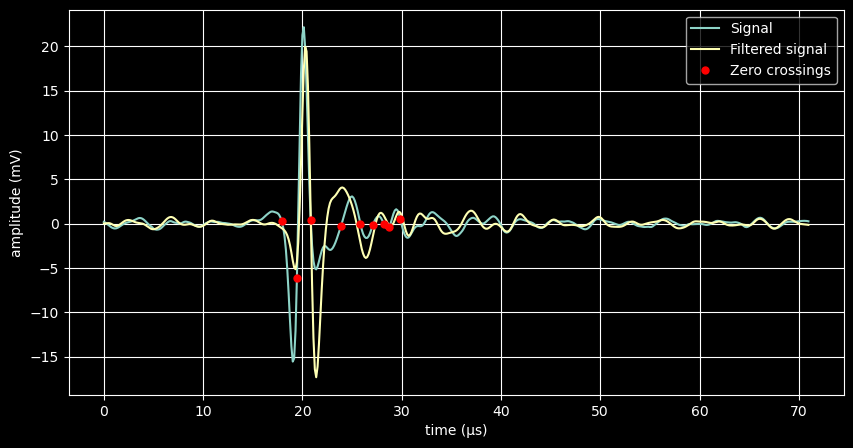

In [13]:
# Sample rate and desired cutoff frequencies (in Hz).
lowcut = 0.5 * dom_freq
highcut = 4 * dom_freq

# Plot the frequency response for a few different orders.
plt.figure(1, figsize=(10, 5))

for order in [2, 3, 4, 5, 6, 7]:  # Higher orders are diverging
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)], '--', label='sqrt(0.5)')
plt.xlabel('frequency (MHz)')
plt.ylabel('gain')
plt.grid(True)
plt.legend(loc='best')

plt.figure(2, figsize=(10, 5))
# plt.clf()
plt.plot(t, singleSignal.iloc[0], label='Signal')

# plt.figure(3)
# plt.clf()
y = butter_bandpass_filter(singleSignal.iloc[0], lowcut, highcut, fs, order=4)
plt.plot(t, y, label='Filtered signal')
plt.xlabel('time (\u03BCs)')
plt.ylabel('amplitude (mV)')
# plt.hlines([-a, a], 0, T, linetyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='best') # loc='upper left'

zero_crossings = np.where(np.diff(np.sign(singleSignal.iloc[0])))[0]
zero_crossings = zero_crossings[(zero_crossings>=np.min(np.where(t>15))) & (zero_crossings<=np.max(np.where(t<30)))]
singleSignal.iloc[0][zero_crossings]
plt.plot(t[zero_crossings], singleSignal.iloc[0, zero_crossings], ls='', marker='o', markersize=5, color = 'r',label='Zero crossings')
plt.legend(loc='best')

plt.show()